In [1]:
"""                             iSIM_MODULES
    ----------------------------------------------------------------------
    
    Miranda-Quintana Group, Department of Chemistry, University of Florida 
    
    ----------------------------------------------------------------------
    
    Please, cite the original paper on iSIM:

    ----------------------------------------------------------------------

    This file contains an example of generation of fingerprints and comparison
    of molecules using the iSIM method.

    """

'                             iSIM_MODULES\n    ----------------------------------------------------------------------\n    \n    Miranda-Quintana Group, Department of Chemistry, University of Florida \n    \n    ----------------------------------------------------------------------\n    \n    Please, cite the original paper on iSIM:\n\n    ----------------------------------------------------------------------\n\n    This file contains an example of generation of fingerprints and comparison\n    of molecules using the iSIM method.\n\n    '

In [10]:
from isim_comp import *
import pandas as pd
import os
import rdkit
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import Draw


In [15]:
### Access remotly the databases worked on the iSIM paper
### The databases are available at: 
git_path = 'https://github.com/molML/MoleculeACE/blob/main/MoleculeACE/Data/benchmark_data/old/'

### Please cite the original paper where the databases were cured:
"""Exposing the Limitations of Molecular Machine Learning with Activity Cliffs. Derek van Tilborg, Alisa Alenicheva, and Francesca Grisoni. 
Journal of Chemical Information and Modeling, 2022, 62 (23), 5938-5951. DOI: 10.1021/acs.jcim.2c01073"""

### Desired dataset 
dataset = 'CHEMBL214_Ki.csv'

### Load the dataset
os.system('git archive --remote=https://github.com/molML/MoleculeACE.git HEAD:/MoleculeACE/Data/benchmark_data/old' + dataset + '| tar -x')

--2024-03-29 16:59:12--  https://github.com/molML/MoleculeACE/blob/main/MoleculeACE/Data/benchmark_data/old/CHEMBL214_Ki.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘CHEMBL214_Ki.csv.2’

     0K .......... .......... .......... .......... ..........  728K
    50K .......... .......... .......... .......... .......... 1.20M
   100K .......... .......... .......... .......... .......... 8.53M
   150K .......... .......... .......... .......... .......... 1.57M
   200K .......... .......... .......... .......... .......... 21.4M
   250K .......... .......... .......... .......... .......... 9.42M
   300K .......... .......... .......... .......... .......... 7.53M
   350K .......... .......... .......... .......... .......... 2.08M
   400K .......... .......... .......... .......... .......... 22.5M
   450K               

0

In [4]:
# Generation of binary fingerprints from a SMILES
# This is step is only necesary if you do not have your data as fingerprints

# Read the SMILES from a csv file
df = pd.read_csv('iSIM_example.csv') # --> This file contains the SMILES of the molecules, change it for your own data
smiles = df['SMILES'].tolist() # --> This is a list of SMILES, change column name for your own data

# Generation of RDKit fingerprints
fps = []
for smi in smiles:
    try:
        mol = Chem.MolFromSmiles(smi)
        fp = np.array([])
        DataStructs.cDataStructs.ConvertToNumpyArray(Chem.RDKFingerprint(mol), fp)
        fps.append(fp)
        
    except:
        print('Invalid SMILES: ', smi)

fps = np.array(fps)

# Optional: save the fingerprints in a npy file
np.save('fps_iSIM_example.npy', fps)    

In [4]:
# Load the fingerprints from a npy file (optional, in case you have already generated the fingerprints)
# fps = np.load('fps_iSIM_example.npy', allow_pickle=True)

In [5]:
# Calculate iSIM value for a desired index
index = 'JT' # --> Change JT, RR or SM
print('Number of molecules: ', len(fps))
print('isim: ', np.round(calculate_isim(fps, n_ary = index), 5))

Number of molecules:  14041
isim:  0.14821


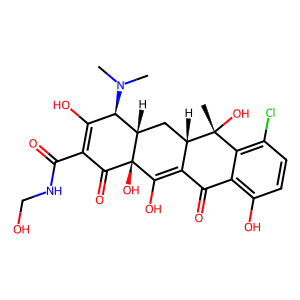

In [6]:
# Get the medoid (most similar molecule to the rest of the molecules), drawing work if smiles are available
medoid = calculate_medoid(fps, n_ary = index)
mol = Chem.MolFromSmiles(smiles[medoid])
Draw.MolToImage(mol)

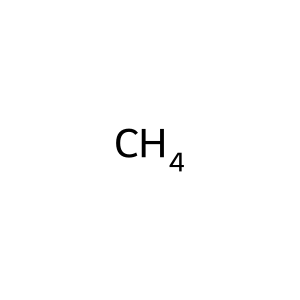

In [7]:
# Get the outliers (most dissimilar molecules to the rest of the molecules), drawing work if smiles are available
outlier = calculate_outlier(fps, n_ary = index)
mol = Chem.MolFromSmiles(smiles[outlier])
Draw.MolToImage(mol)